In [4]:
import importlib.metadata
print(importlib.metadata.version("quandl"))

3.7.0


## Importing libraries and data

In [5]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from statsmodels.tsa.stattools import adfuller


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [6]:
# Importing Data
path = r'C:\Users\ztrim\07-2025 Boat Sales Analysis'

In [7]:
path

'C:\\Users\\ztrim\\07-2025 Boat Sales Analysis'

In [8]:
df_boat = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_boat_data.csv'), index_col = False)

In [9]:
df_gdp = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_122367.csv'), index_col=False)

In [10]:
# Preview data
df_gdp.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27458.225330,27441.529660,28440.051960,30082.127640,31096.205070,22855.932320,27200.061080,30559.533530,33984.790620,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.121835,186.941781,197.402402,225.440494,208.999748,226.876513,...,1479.615260,1329.807285,1520.212231,1538.901679,1493.817938,1344.103210,1522.393346,1628.318944,1568.159891,1673.841139
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,565.569730,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.939925,127.454189,133.827044,139.008291,148.549379,155.565216,...,1860.727694,1630.039447,1574.230560,1720.140280,1798.340685,1680.039332,1765.954788,1796.668633,1599.392983,1284.154441
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3213.902611,1807.952941,2437.259712,2538.591391,2189.855714,1449.922867,1925.874661,2929.694455,2309.534130,2122.083690
5,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3981.726623,4168.375445,4614.047969,5365.488802,5460.430509,5370.777500,6413.282808,6846.426694,8575.171346,10011.627990
6,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,38654.934720,40129.819200,40672.994330,42819.774580,41257.804580,37361.090070,42425.699680,42414.059010,46812.448450,49303.673390
7,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,212.889663,210.805415,225.800630,243.897432,256.180141,...,6262.041685,6012.512444,6066.726791,6668.216728,6638.485415,5722.480995,6681.708952,7931.617893,7479.688091,7521.153309
8,United Arab Emirates,ARE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43534.997270,41326.401820,42340.591720,45689.857000,44251.454140,37173.875410,43360.021100,49899.065300,49040.694750,49377.564340
9,Argentina,ARG,GDP per capita (current US$),NY.GDP.PCAP.CD,778.251707,971.338043,870.217491,852.972425,1176.200862,1281.833380,...,13679.626500,12699.962310,14532.500930,11752.799890,9955.974787,8535.599380,10738.017920,13935.681110,14187.482730,13858.203980


In [11]:
# Notes: I used a publicly available GDP dataset, which had years as columns (wide format). 
# Since time series analysis requires a date-indexed structure, I reshaped the data using .melt() (had to ask chatgpt how and this is what it gave me)
# to make it tidy just like the structure used in the example notebook.

In [12]:
# Filter and clean GDP dataset
boat_countries = ['Germany', 'France', 'Switzerland', 'Italy', 'Netherlands', 'Austria', 'Spain', 'Denmark', 'Slovenia']

In [13]:
# Keep only rows for those countries
df_gdp_filtered = df_gdp[df_gdp['Country Name'].isin(boat_countries)]

In [14]:
# Convert wide format into long tidy format
df_gdp_melted = df_gdp_filtered.melt(
    id_vars=['Country Name'],
    value_vars=[str(year) for year in range(1960, 2025)],
    var_name='Year',
    value_name='GDP_per_capita'
)

In [15]:
# Format and clean
df_gdp_melted['Year'] = pd.to_datetime(df_gdp_melted['Year'], format='%Y')
df_gdp_melted = df_gdp_melted.dropna()
df_gdp_melted.rename(columns={'Country Name': 'Country'}, inplace=True)

In [16]:
# Check how it looks
df_gdp_melted.head()

,Country,Year,GDP_per_capita
0,Austria,1960-01-01,939.914815
1,Switzerland,1960-01-01,1954.311321
2,Germany,1960-01-01,1162.122668
3,Denmark,1960-01-01,1389.021394
4,Spain,1960-01-01,407.963028


In [17]:
# Subset for Germany only and restrict to 1980–2023.
germany_gdp = df_gdp_melted[df_gdp_melted['Country'] == 'Germany'].copy()
germany_gdp = germany_gdp[germany_gdp['Year'].dt.year >= 1980]
germany_gdp.set_index('Year', inplace=True)

In [18]:
# Check how it looks
germany_gdp.head()

,Country,GDP_per_capita
Year,,
1980-01-01,Germany,12182.780020
1981-01-01,Germany,10246.476760
1982-01-01,Germany,9950.059260
1983-01-01,Germany,9900.485592
1984-01-01,Germany,9347.290684


In [19]:
# Notes: I selected the world bank GDP per capita dataset because it includes yearly economic data by country, which connects to my boat dataset that contains boat listings across different European countries. 
# I filtered the data to only include Germany to create a clearer link between economic conditions and the boat market in that country. Since the data is annual and historical, 
# it’s suitable for time-series analysis and doesn’t include any future or forecasted values. This can be repeated for each country if required in the future. 

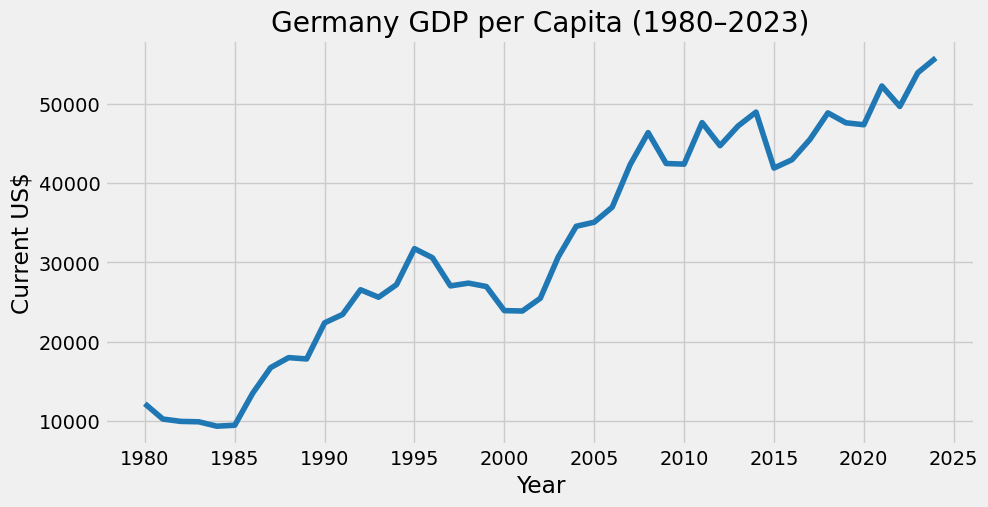

In [20]:
# Create a line chart of your data.
plt.figure(figsize=(10, 5))
plt.plot(germany_gdp['GDP_per_capita'], color='tab:blue')
plt.title('Germany GDP per Capita (1980–2023)')
plt.ylabel('Current US$')
plt.xlabel('Year')
plt.grid(True)
plt.show()

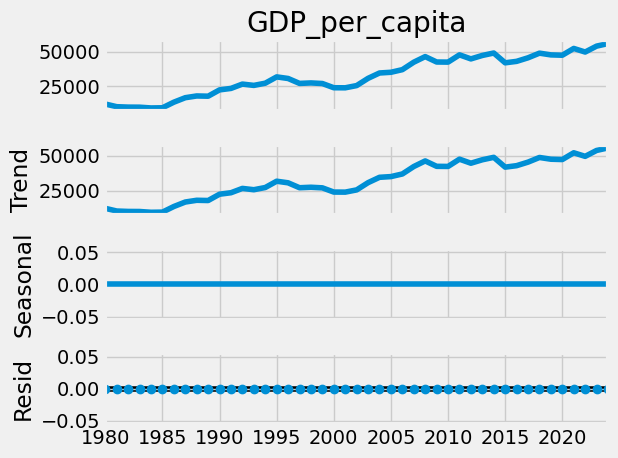

In [21]:
# 5: Decompose the data’s components.
decomposition = sm.tsa.seasonal_decompose(germany_gdp['GDP_per_capita'], model='additive', period=1)
decomposition.plot()
plt.tight_layout()
plt.show()

In [22]:
# 5.5 Analyze the results from the plot in a markdown cell
# The plot shows that Germany’s GDP per capita has been going up over time. Since the data is yearly, there isn’t much seasonal change. 
# The leftover part (residual) just shows small ups and downs around the main trend.

In [23]:
# 6: Conduct a Dickey-Fuller test to check for stationarity. 
result = adfuller(germany_gdp['GDP_per_capita'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -0.37983229037604116
p-value: 0.9134119967997714
Critical Values: {'1%': -3.5885733964124715, '5%': -2.929885661157025, '10%': -2.6031845661157025}


In [24]:
# 6.1 Interpret the results in a markdown cell and reference your null hypothesis.
# Based on the test results the p-value is likely above 0.05, meaning the series is not stationary.
# so I need to difference the data.

In [25]:
# 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
germany_diff = germany_gdp['GDP_per_capita'].diff().dropna()

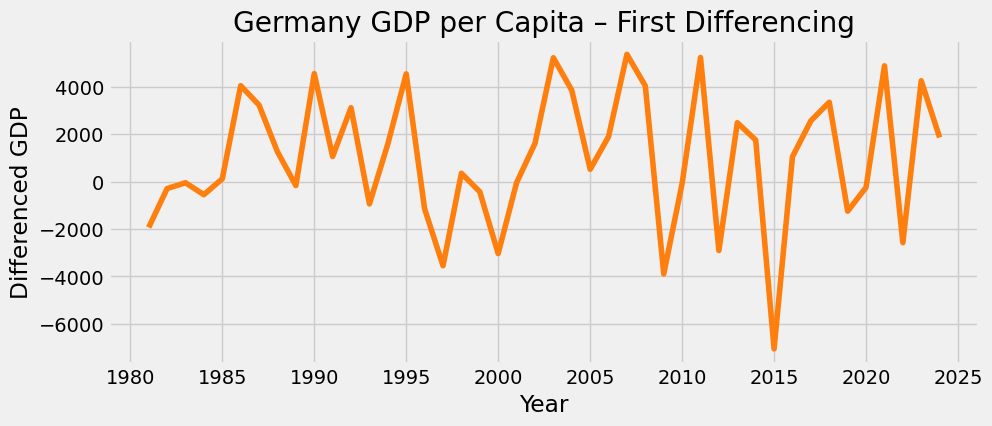

In [26]:
plt.figure(figsize=(10, 4))
plt.plot(germany_diff, color='tab:orange')
plt.title('Germany GDP per Capita – First Differencing')
plt.ylabel('Differenced GDP')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [27]:
# 8: If your data still isn’t stationary, perform another round of differencing and repeat step 6.
adf_result = adfuller(germany_diff)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

ADF Statistic: -5.711152763697759
p-value: 7.294552014121104e-07


In [28]:
# Note: The p-value from the ADF test was far below 0.05 which means the data is now stationary. 
# This means I don’t need to apply a second round of differencing.

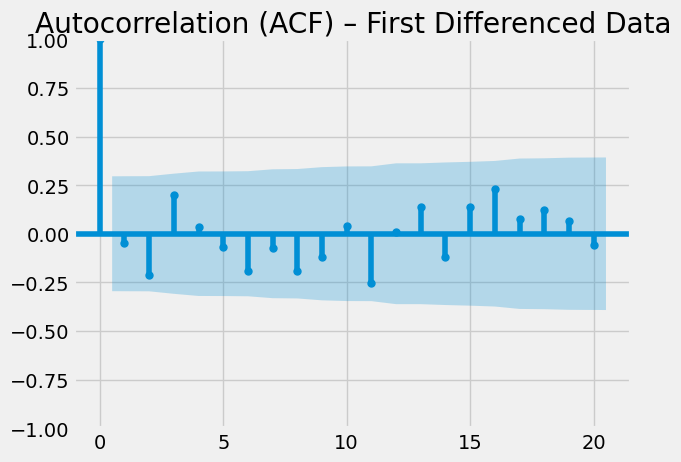

In [29]:
# 9. Check your data’s autocorrelations.
plot_acf(germany_diff, lags=20)
plt.title('Autocorrelation (ACF) – First Differenced Data')
plt.show()

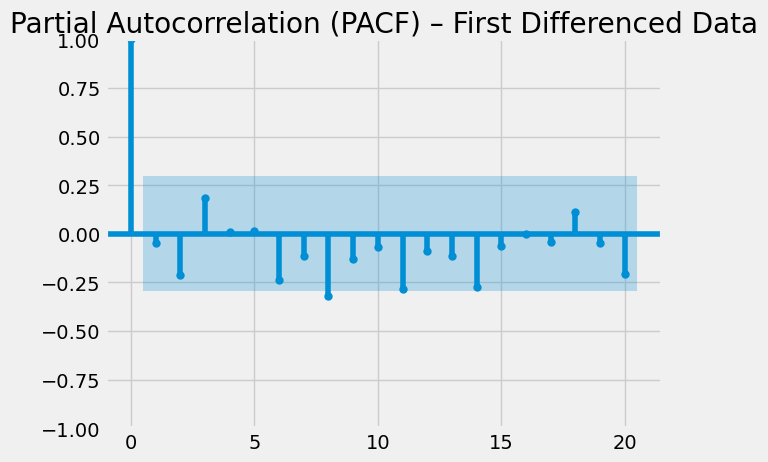

In [30]:
plot_pacf(germany_diff, lags=20)
plt.title('Partial Autocorrelation (PACF) – First Differenced Data')
plt.show()